In [ ]:
pip install pandasql

In [178]:
import pandas as pd
import pandasql as pdsql
import matplotlib.pyplot as plt
import seaborn as sbs

# 1. Carregar com Python o arquivo CSV:1. Carregar com Python o arquivo CSV: https://drive.google.com/file/d/1p9yRzJ1yH1RlsP3KOe-3BzHADtAly1BL/view?usp=sharing

In [ ]:
#Carregando o arquivo .csv para o exercício
# Talvez carregar diretamente do link do drive
url = "https://drive.google.com/file/d/1p9yRzJ1yH1RlsP3KOe-3BzHADtAly1BL/view?usp=sharing"
url = "https://drive.google.com/uc?id=" + url.split('/')[-2]
amostra = pd.read_csv(url)
amostra

# 2. Identificar e remover registros repetidos;

In [180]:
#Excluindo as linhas duplicadas de acordo com a coluna nome_curso
amostraDD = amostra.drop_duplicates("nome_curso")
amostraDD

,sistema_ensino,tipo_escola,uf,nome_escola,codigo_curso,nome_curso,oferta,eixo_tecnologico,modalidade,data_criacao,carga_horaria_toral,modalidade_ensino,status_curso,tipo_oferta,vagas_ofertas,qtd_de_matriculas
0,Federal,Escolas Técnicas,SP,SENAC JUNDIAI,4,Maquiador,Concomitante,Ambiente e Saúde,Educação Presencial,8/19/19 12:59,160,Educação Presencial,Concluído,2.0,NaN,18
3,Federal,Escolas de Oferta Outros Cursos,SC,Instituto Federal de Santa Catarina - Campus F...,6,Técnico em Química,Integrado,Produção Industrial,Educação Presencial,8/19/19 16:40,4080,Educação Presencial,Ativo,1.0,32.0,33
7,Federal,Escolas de Oferta Outros Cursos,MS,INSTITUTO FEDERAL DO MATO GROSSO DO SUL CAMPUS...,3,VENDEDOR,NaN,Gestão e Negócios,Educação a Distância,8/19/19 17:15,180,Educação a Distância,Concluído,NaN,40.0,33
8,Federal,Escolas de Oferta Outros Cursos,SC,Instituto Federal de Santa Catarina - Campus F...,7,Técnico em Manutenção Automotiva,Subsequente,Controle e Processos Industriais,Educação Presencial,8/19/19 18:31,1200,Educação Presencial,Ativo,3.0,36.0,33
12,Federal,Escolas Técnicas,SP,SENAC PENHA,2,FORMAÇÃO BÁSICA EM CONFEITARIA,Concomitante,"Turismo, Hospitalidade e Lazer",Educação Presencial,8/19/19 18:32,48,Educação Presencial,Concluído,2.0,NaN,16
15,Federal,Escolas de Oferta Outros Cursos,SC,Instituto Federal de Santa Catarina - Campus F...,5,Técnico em Guia de Turismo,Subsequente,"Turismo, Hospitalidade e Lazer",Educação Presencial,8/19/19 13:07,800,Educação Presencial,Ativo,3.0,10.0,5
19,Federal,Escolas Técnicas,SP,SENAC PIRACICABA,33,Técnicas de Rejuvenescimento e clareamento de ...,Concomitante,Ambiente e Saúde,Educação Presencial,8/19/19 15:01,24,Educação Presencial,Concluído,2.0,NaN,11
22,Federal,Escolas Técnicas,PR,senac -francisco beltrão,10,QUALIDADE NO ATENDIMENTO AO CLIENTE,Concomitante,Gestão e Negócios,Educação Presencial,8/19/19 15:59,15,Educação Presencial,Concluído,2.0,NaN,16
24,Federal,Escolas Técnicas,MA,senac - Serviço nacional de aprendizagem comer...,14,Técnico em Design de Interiores,Concomitante,Produção Cultural e Design,Educação a Distância,8/19/19 18:10,1200,Educação a Distância,Ativo,2.0,NaN,0
27,Federal,Escolas Técnicas,MA,senac - Serviço nacional de aprendizagem comer...,11,Técnico em Administração,Concomitante,Gestão e Negócios,Educação a Distância,8/19/19 18:24,1000,Educação a Distância,Ativo,2.0,NaN,3


# 3. Utilizar o pandasql para fazer uma busca (select): (i) discriminar quais dados possuem na coluna "nome_curso", (ii) filtrar os registros que possuem valor 0 (zero) na coluna "qtd_de_matriculas" e deletar esses registros;

In [54]:
#Discriminando os dados da coluna nome_curso
amostraNomes = pysqldf("SELECT nome_curso FROM amostraDD")
amostraNomes

,nome_curso
0,Maquiador
1,Técnico em Química
2,VENDEDOR
3,Técnico em Manutenção Automotiva
4,FORMAÇÃO BÁSICA EM CONFEITARIA
5,Técnico em Guia de Turismo
6,Técnicas de Rejuvenescimento e clareamento de ...
7,QUALIDADE NO ATENDIMENTO AO CLIENTE
8,Técnico em Design de Interiores
9,Técnico em Administração


In [24]:
#Carregando a função do pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
#Filtrar os registros com valor 0 de matrículas e deletar
q = """
    SELECT * FROM amostraDD
    WHERE qtd_de_matriculas != 0 
    """

amostraFiltrada = pysqldf(q)
amostraFiltrada

# 4.Salvar o novo dataframe em um arquivo CSV;

In [39]:
#Salvando o df em um arquivo .csv
amostraFiltrada.to_csv("amostraFiltrada.csv")

# 5. Plotar um boxplot envolvendo as colunas "nome_escola" e "qtd_de_matriculas".

In [120]:
#Estabelecendo o tamanho do gráfico
plt.rcParams["figure.figsize"] = [7, 7]

In [ ]:
#Selecionando as colunas para realizar o boxplot
q = """
    SELECT nome_escola, qtd_de_matriculas FROM amostraDD
    WHERE qtd_de_matriculas != 0 
    """

amostraPlot = pysqldf(q)
amostraPlot

In [193]:
#Somando os registros duplicados por escola
amostraPlot = amostraPlot.groupby(['nome_escola']).sum()
amostraPlot = amostraPlot.sort_values('qtd_de_matriculas', ascending=False)
amostraPlot

,qtd_de_matriculas
nome_escola,
Instituto Federal de Santa Catarina - Campus Garopaba,196
SENAC PIRACICABA,76
SENAC PENHA,76
Instituto Federal de Santa Catarina - Campus Florianópolis,66
BEZERRA DE MENEZES INSTITUTO TECNICO,59
Instituto Federal de Brasília - Campus São Sebastião,42
INSTITUTO FEDERAL DO MATO GROSSO DO SUL CAMPUS DOURADOS,33
CRIARTE COLEGIO,32
SENAC/PE - SERVIÇO NACIONAL DE APRENDIZAGEM COMERCIAL,31


Text(0, 0.5, 'matrícula por escola')

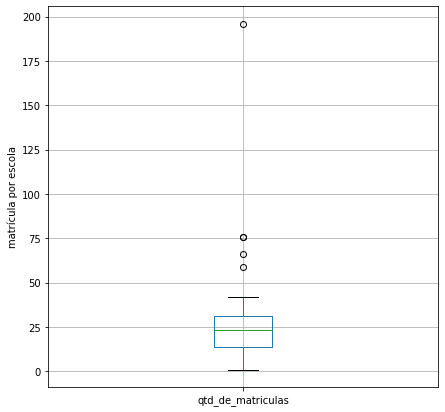

In [172]:
#Ainda não conseguir elaborar como fazer o boxplot com as duas colunas
boxPlot = plt.subplot()

#Esse é o plot com a distribuição da quantidade de matrículas em todas as escolas 
boxPlot = amostraPlot.boxplot(column='qtd_de_matriculas')
boxPlot.set_ylabel('matrícula por escola')

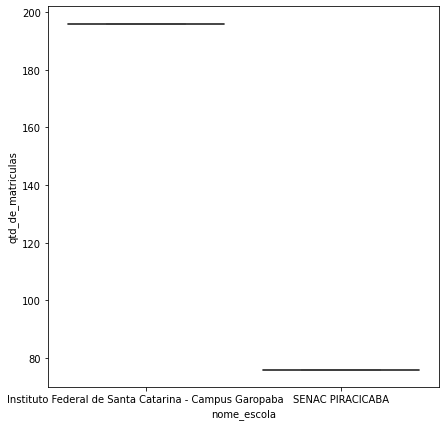

In [184]:
#Primeira tentativa do exercício sem sucesso, tentei em pandas, matplotlib e agora seaborn 
sbs.boxplot(x=amostraPlot.index[:2], y=amostraPlot['qtd_de_matriculas'][:2], data=pd.melt(amostraPlot))
plt.show()

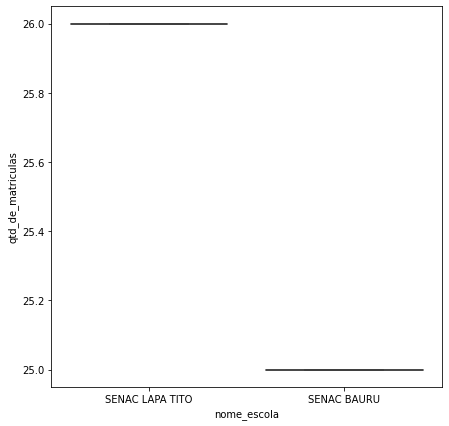

In [189]:
#Sem uma sequência produzir os gráficos, vendo que cada escola tem apenas um número fixo de matrículas
# e não através do tempo, ou por tipo de escola, só pensei em fazer os boxplots assim, o que acaba sendo
# um uso ineficiente do boxplot, podendo aproveitar melhor o dataset com outros tipos de gráfico 
sbs.boxplot(x=amostraPlot.index[12:14], y=amostraPlot['qtd_de_matriculas'][12:14], data=pd.melt(amostraPlot))
plt.show()